<span style="color: blue; font-size: 48px; font-weight: bold">Data Analysis of T20 IPL Data From 2008-2024</span>

---

######
## __Overview:__
### This project aims to analyze various aspects of the Indian Premier League (IPL) T20 cricket tournament from 2008 to 2024. The analysis includes statistical insights into runs scored, team performances, player achievements, stadium characteristics, and the impact of toss decisions on match outcomes.

## __Questions:__

### Q.1) What is the total runs scored in each season, and who was the champion of that season?
### Q.2) What is the run scored per match in each season?
### Q.3) What is the number of tosses won by each team?
### Q.4) Compare the toss decision (batting or fielding) trends across all IPL seasons.
### Q.5) How many matches have been owned by wicket (bowling team own the match), bat (batting team own the match), or was a tie?
### Q.6) Which stadium is statistically better for bowlers?
### Q.7) Which stadium is statistically better for batters?
### Q.8) What is the relationship between winning the toss and winning the match?
### Q.9) Who are the top 15 players with the highest runs scored in the entire history of IPL?
### Q.10) How has AB de Villiers been dismissed (modes of dismissal) throughout his IPL career?
### Q.11) Who are the top 10 players with the highest number of Player of the Match (POM) awards?
### Q.12) Who are the highest wicket-takers in IPL history?
### Q.13) How has R Ashwin performed in terms of bowling statistics throughout his IPL career?
### Q.14) Who are the top 15 bowlers who have conceded the highest number of extras in IPL history?
### Q.15) What is the strike rate of the top 5 players in the last 5 IPL seasons?
####
---
####

### *Import the required libraries*

In [655]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### *Load the datasets*

In [656]:
matches=pd.read_csv(r"E:\Recourse\matches.csv", parse_dates=['date'])
corrections = {
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals'
}
matches['team1'] = matches['team1'].replace(corrections)
matches['team2'] = matches['team2'].replace(corrections)
matches['winner'] = matches['winner'].replace(corrections)
matches['toss_winner'] = matches['toss_winner'].replace(corrections)
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [657]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1044 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  target_runs      1092 non-null   float64

In [658]:
deliveries=pd.read_csv(r"E:\Recourse\deliveries.csv")
deliveries['batting_team'] = deliveries['batting_team'].replace(corrections)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(corrections)
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [659]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [660]:
matches['date']=pd.to_datetime(matches['date'])
matches['year']=matches['date'].dt.year
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,2008


In [661]:
merged_data = pd.merge(deliveries, matches, left_on='match_id', right_on='id', how='left')
merged_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008


In [662]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          260920 non-null  int64         
 1   inning            260920 non-null  int64         
 2   batting_team      260920 non-null  object        
 3   bowling_team      260920 non-null  object        
 4   over              260920 non-null  int64         
 5   ball              260920 non-null  int64         
 6   batter            260920 non-null  object        
 7   bowler            260920 non-null  object        
 8   non_striker       260920 non-null  object        
 9   batsman_runs      260920 non-null  int64         
 10  extra_runs        260920 non-null  int64         
 11  total_runs        260920 non-null  int64         
 12  extras_type       14125 non-null   object        
 13  is_wicket         260920 non-null  int64         
 14  play

## __Q.1) What is the total run scored in each season and who was champion of that season?__

In [663]:
#Total run score in each season by each team
def last_value(x):
    return x.iloc[-1]
total_run_per_season=merged_data.groupby(['season']).agg(total_runs=('total_runs', 'sum'), champ=('winner', last_value)).reset_index()
total_run_per_season

,season,total_runs,champ
0,2007/08,17937,Rajasthan Royals
1,2009,16353,Deccan Chargers
2,2009/10,18883,Chennai Super Kings
3,2011,21154,Chennai Super Kings
4,2012,22453,Kolkata Knight Riders
5,2013,22602,Mumbai Indians
6,2014,18931,Kolkata Knight Riders
7,2015,18353,Mumbai Indians
8,2016,18862,Sunrisers Hyderabad
9,2017,18786,Mumbai Indians


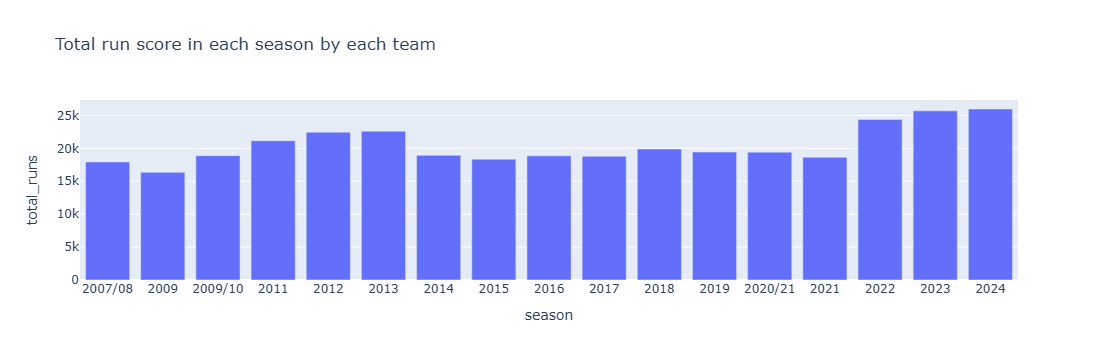

In [687]:
fig=px.bar(total_run_per_season, x='season', y='total_runs', hover_data=['champ'], title='Total run score in each season by each team', height=550)
fig.show()

### __Q.2) What is the run scored per match in each season?__

In [665]:
#run scored per match in each season
matches_per_season=matches.groupby('season')['id'].count().reset_index()
runs_permatch = pd.merge(total_run_per_season, matches_per_season,on='season')
runs_permatch.rename(columns={'id': 'num_matches'}, inplace=True)
runs_permatch['score_per_match']=(runs_permatch['total_runs']/runs_permatch['num_matches']).round(2)
runs_permatch

,season,total_runs,champ,num_matches,score_per_match
0,2007/08,17937,Rajasthan Royals,58,309.26
1,2009,16353,Deccan Chargers,57,286.89
2,2009/10,18883,Chennai Super Kings,60,314.72
3,2011,21154,Chennai Super Kings,73,289.78
4,2012,22453,Kolkata Knight Riders,74,303.42
5,2013,22602,Mumbai Indians,76,297.39
6,2014,18931,Kolkata Knight Riders,60,315.52
7,2015,18353,Mumbai Indians,59,311.07
8,2016,18862,Sunrisers Hyderabad,60,314.37
9,2017,18786,Mumbai Indians,59,318.41


### __Q.3) What is the number of tosses own by each team?__

In [666]:
#Number of tosses own by each team
tosses_own_by_each_team=matches.groupby('toss_winner').agg(toss_wins=('toss_winner', 'count')).sort_values(by='toss_wins').reset_index()
tosses_own_by_each_team

,toss_winner,toss_wins
0,Kochi Tuskers Kerala,8
1,Rising Pune Supergiant,13
2,Gujarat Lions,15
3,Lucknow Super Giants,19
4,Pune Warriors,20
5,Gujarat Titans,22
6,Deccan Chargers,43
7,Sunrisers Hyderabad,88
8,Punjab Kings,109
9,Rajasthan Royals,120


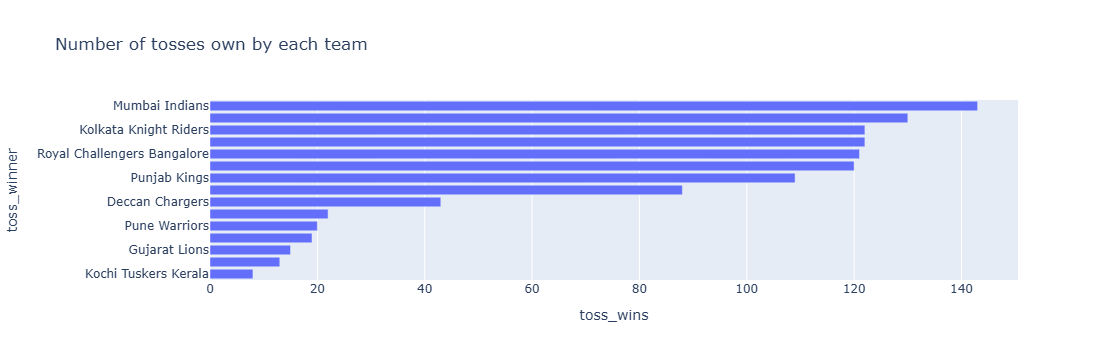

In [688]:
fig1=px.bar(tosses_own_by_each_team, x='toss_wins', y='toss_winner', orientation='h', title='Number of tosses own by each team', height=500)
fig1.show()

### __Q.4) Compare the toss decision (batting or fielding) trends across all IPL seasons__

In [668]:
#analyze the toss decession
#fig2 = px.bar(matches, x='season', color='toss_decision', barmode='group', title='Count Plot of Toss Decision by Season', height=550)
toss_decision_counts = matches.groupby(['season', 'toss_decision']).size().reset_index(name='count')
toss_decision_counts

,season,toss_decision,count
0,2007/08,bat,26
1,2007/08,field,32
2,2009,bat,35
3,2009,field,22
4,2009/10,bat,39
5,2009/10,field,21
6,2011,bat,25
7,2011,field,48
8,2012,bat,37
9,2012,field,37


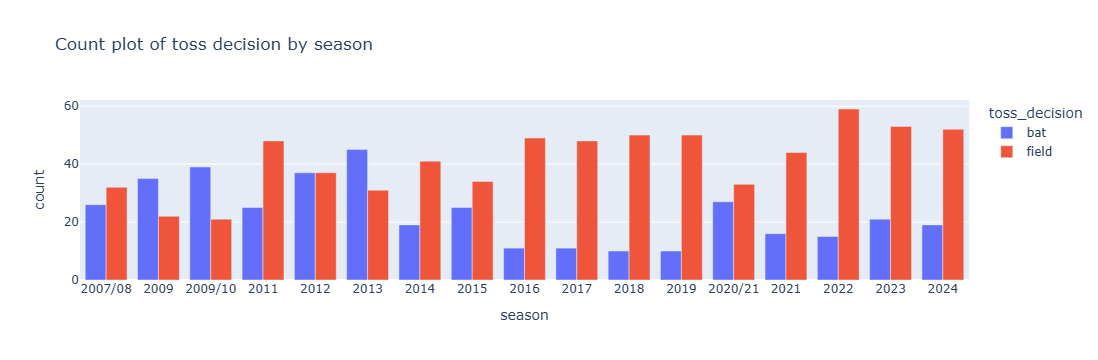

In [689]:
fig2 = px.bar(toss_decision_counts, x='season', y='count', color='toss_decision', barmode='group', 
              title='Count plot of toss decision by season', height=550)
fig2.show()

### __Q.5) How many matches have been owned by wicket (bowling team own the match), bat (batting team own the match), or was a tie?__

In [670]:
#how many match has been own by wicket (bowling team own the match), bat (batting team own the match) or was a tie
matchown=matches['result'].value_counts()
matchown

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

### __Q.6) Which stadium is statistically better for bowlers?__

In [671]:
#which stadium is good for bowlers?
bowling_stadium=matches.venue[matches.result=='wickets'].mode()
bowling_stadium

0    Eden Gardens
Name: venue, dtype: object

### __Q.7) Which stadium is statistically better for batters?__

In [672]:
#which stadium is good for batters?
batting_stadium=matches.venue[matches.result=='runs'].mode()
batting_stadium

0    Wankhede Stadium
Name: venue, dtype: object

### __Q.8) What is the relationship between winning the toss and winning the match?__

In [673]:
tossw_matchw=matches['toss_winner']==matches['winner']
tossw_matchw=tossw_matchw.to_frame(name='tossw_matchw')
tossw_matchwg=tossw_matchw.value_counts().reset_index()
tossw_matchwg.columns= ['won_toss&match', 'count']
fig3=px.bar(tossw_matchwg, x='won_toss&match', y='count', height=550)
fig3.show()

### __Q.9) Who are the top 15 players with the highest runs scored in the entire history of IPL?__

In [674]:
#highest run scorer
totalbatter_score=deliveries.groupby('batter')['batsman_runs'].sum()
totalbatter_score_df = totalbatter_score.to_frame().reset_index()
totalbatter_score_df.columns = ['Batter', 'total_runs']
totalbatter_score_df=totalbatter_score_df.sort_values(by='total_runs', ascending=False).reset_index()
totalbatter_score_df.head(15)

,index,Batter,total_runs
0,631,V Kohli,8014
1,512,S Dhawan,6769
2,477,RG Sharma,6630
3,147,DA Warner,6567
4,546,SK Raina,5536
5,374,MS Dhoni,5243
6,30,AB de Villiers,5181
7,124,CH Gayle,4997
8,501,RV Uthappa,4954
9,282,KD Karthik,4843


### __Q.10) How has AB de Villiers been dismissed (modes of dismissal) throughout his IPL career?__

In [675]:
#Analyzing AB de Villiers
ABde=deliveries[deliveries['batter']=='AB de Villiers']
ABde_dismissed=ABde['dismissal_kind'].value_counts()
ABde_dismissed_df=ABde_dismissed.to_frame().reset_index()
fig4 = px.pie(ABde_dismissed_df, values='count', names='dismissal_kind', title='AB de Villiers wicket stat')
fig4.show()

### __Q.11) Who are the top 10 players with the highest number of Player of the Match (POM) awards?__

In [676]:
#Players with highest no of POM awards
df=matches.groupby('player_of_match').agg(no_of_times=('player_of_match', 'count'))
pom_awards=df.sort_values(by='no_of_times', ascending=False).reset_index()
pom_awards.head(15)

,player_of_match,no_of_times
0,AB de Villiers,25
1,CH Gayle,22
2,RG Sharma,19
3,DA Warner,18
4,V Kohli,18
5,MS Dhoni,17
6,SR Watson,16
7,YK Pathan,16
8,RA Jadeja,16
9,AD Russell,15


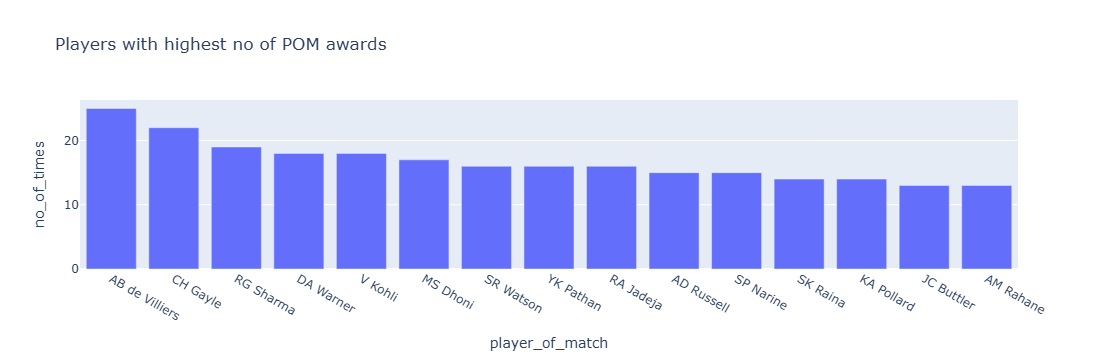

In [690]:
fig5=px.bar(pom_awards.head(15), x='player_of_match', y='no_of_times', title='Players with highest no of POM awards', height=550)
fig5.show()

### __Q.12) Who are the highest wicket-takers in IPL history?__

In [678]:
#highest wicket taker
wicket_taker=deliveries.groupby('bowler')['is_wicket'].sum()
wicket_taker_df = wicket_taker.to_frame().reset_index()
wicket_taker_df.columns = ['Bowler', 'no_of_wickets']
wicket_taker_df=wicket_taker_df.sort_values(by='no_of_wickets', ascending=False)
wicket_taker_df.head(15)

,Bowler,no_of_wickets
524,YS Chahal,213
119,DJ Bravo,207
348,PP Chawla,201
446,SP Narine,200
355,R Ashwin,198
71,B Kumar,195
438,SL Malinga,188
8,A Mishra,183
193,JJ Bumrah,182
373,RA Jadeja,169


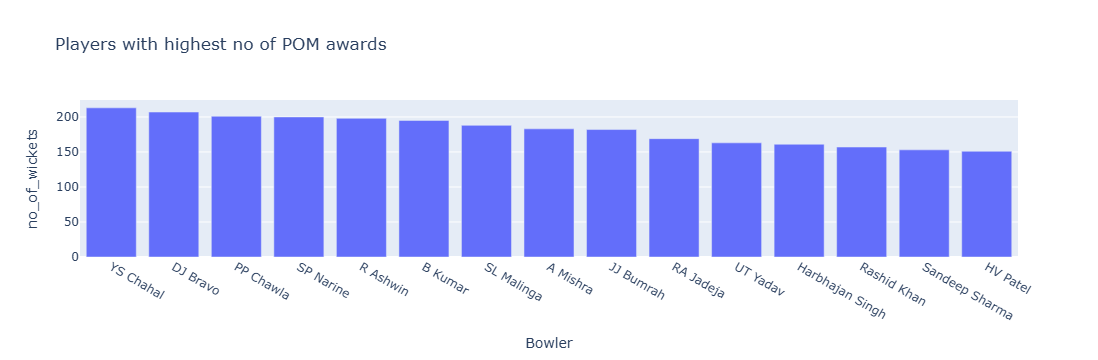

In [691]:
fig6=px.bar(wicket_taker_df.head(15), x='Bowler', y='no_of_wickets', title='Players with highest no of POM awards', height=550)
fig6.show()

### __Q.13) How has R Ashwin performed in terms of bowling statistics throughout his IPL career?__

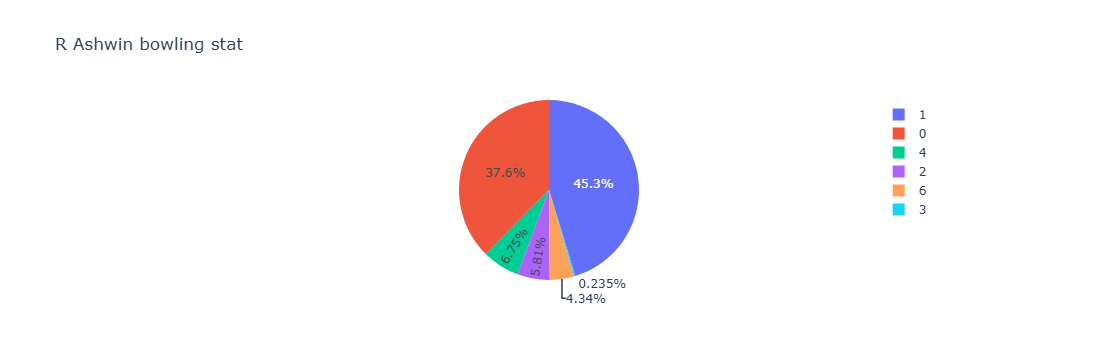

In [680]:
#Analyzing R Ashwin
RAshwin=deliveries[deliveries['bowler']=='R Ashwin']
RAshwin=RAshwin['batsman_runs'].value_counts()
RAshwin_df=RAshwin.to_frame().sort_values(by='batsman_runs').reset_index()
fig7 = px.pie(RAshwin_df, values='count', names='batsman_runs', title='R Ashwin bowling stat')
fig7.show()

### __Q.14) Who are the top 15 bowlers who have conceded the highest number of extras in IPL history?__

In [681]:
extra_deliveries=deliveries['extras_type'].value_counts()
extra_deliveries

extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

In [682]:
extra = deliveries.pivot_table(index='bowler', columns='extras_type', aggfunc='size', fill_value=0)
extra ['extras']=extra[['byes', 'legbyes', 'noballs', 'penalty', 'wides']].sum(axis=1)
extras=extra.sort_values(by='extras', ascending=False).head(15).reset_index()
extras

extras_type,bowler,byes,legbyes,noballs,penalty,wides,extras
0,B Kumar,9,88,12,0,138,247
1,DJ Bravo,2,54,9,0,167,232
2,SL Malinga,15,58,18,1,128,220
3,UT Yadav,14,62,23,0,110,209
4,R Ashwin,5,49,4,0,151,209
5,I Sharma,5,61,23,0,97,186
6,P Kumar,4,68,1,0,112,185
7,JJ Bumrah,8,64,33,0,77,182
8,Mohammed Siraj,8,39,8,0,115,170
9,HV Patel,7,40,16,0,106,169


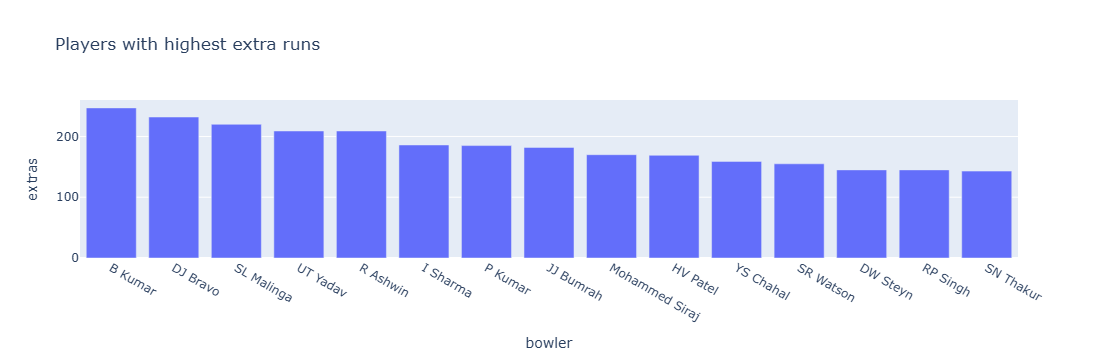

In [683]:
fig8=px.bar(extras, x='bowler', y='extras', hover_data=['byes', 'legbyes', 'noballs', 'penalty', 'wides'], title='Players with highest extra runs', height=550)
fig8.show()

### __Q.15) What is the strike rate of the top 5 players in the last 5 IPL seasons?__

In [684]:
strike=merged_data.groupby(['season','batter']).agg(runs=('batsman_runs', 'sum'), balls_played=('ball', 'count')).sort_values(by='season')
strike ['strike_rate']=((strike['runs']/strike['balls_played'])*100).round(2)
strike

runs  balls_played  strike_rate
season  batter                                        
2007/08 A Chopra         42            55        76.36
        RR Sarwan        73            78        93.59
        RT Ponting       39            53        73.58
        RV Uthappa      320           291       109.97
        S Anirudha        1             8        12.50
...                     ...           ...          ...
2024    KA Maharaj        1             2        50.00
        KD Karthik      326           195       167.18
        KH Pandya       133           112       118.75
        JC Buttler      359           266       134.96
        Yudhvir Singh    21            14       150.00

[2617 rows x 3 columns]

In [685]:
top_10_strike_rate = strike.sort_values(by=['season', 'strike_rate'], ascending=[True, False]).groupby('season').head(5).reset_index()
top_10_strike_rate

,season,batter,runs,balls_played,strike_rate
0,2007/08,Umar Gul,39,19,205.26
1,2007/08,CRD Fernando,2,1,200.00
2,2007/08,BB McCullum,188,96,195.83
3,2007/08,SD Chitnis,18,10,180.00
4,2007/08,V Sehwag,406,229,177.29
...,...,...,...,...,...
80,2024,L Wood,9,3,300.00
81,2024,R Shepherd,57,24,237.50
82,2024,J Fraser-McGurk,330,150,220.00
83,2024,R Sai Kishore,13,6,216.67


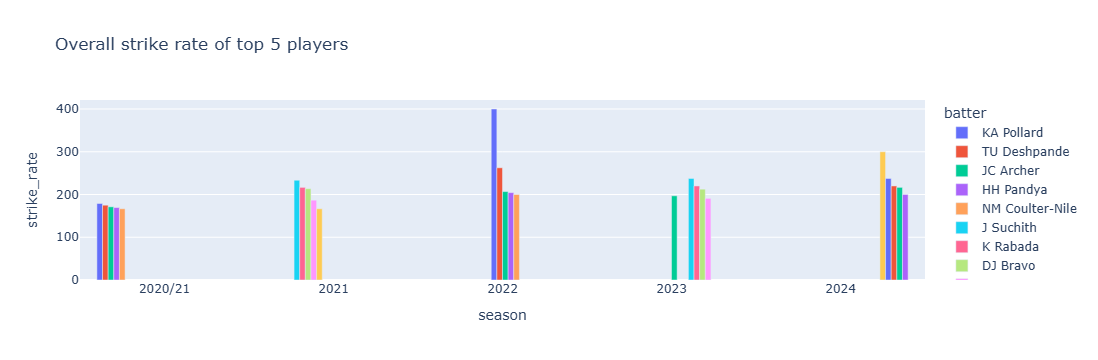

In [686]:
selected_seasons = ['2020/21', '2021', '2022', '2023', '2024']
filtered_data = top_10_strike_rate[top_10_strike_rate['season'].isin(selected_seasons)]
fig9 = px.bar(filtered_data, x='season', y='strike_rate', hover_data=['runs', 'balls_played'], color='batter', barmode='group', 
          title='Overall strike rate of top 5 players', height=550)
fig9.show()